

```
# รวบรวมข้อมูล ทั้งแบบ Manual รวมใส่ VBA จัดเตรียม Data Sheet และ ทำความสะอาดข้อมูลจัดการค่า error จัดรูปแบบของข้อความให้เหมาะกับการนำไปใช้กับ Machine Learning
วิธีการ ]
1. Copy ข้อมูลลงใน Files Sheet
2. ดึงข้อมูลด้วยวิธีการ API
```



In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import yfinance as yf

# กำหนดสัญลักษณ์หุ้นไทยที่ต้องการดึงข้อมูล เช่น PTT.BK
symbol = "PTT.BK"  # แทนค่าด้วยหุ้นที่ต้องการ

# ดึงข้อมูลหุ้น
stock = yf.Ticker(symbol)
info = stock.info
hist = stock.history(period="1d", interval="5m")

# แสดงข้อมูลล่าสุดที่ดึงมาได้
latest_data = {
    "Date": pd.Timestamp.now(),
    "Close": hist["Close"].iloc[-1],
    "Open": hist["Open"].iloc[0],
    "High": hist["High"].max(),
    "Low": hist["Low"].min(),
    "Volume": hist["Volume"].sum(),
    "Previous Close": info.get("previousClose"),
    "Market Cap": info.get("marketCap"),
    "PE Ratio": info.get("trailingPE"),
    "EPS (TTM)": info.get("trailingEps"),
    "1Y Target Est": info.get("targetMeanPrice"),
    "Day's Range": f"{hist['Low'].min()} - {hist['High'].max()}",
    "52 Week Range": f"{info.get('fiftyTwoWeekLow')} - {info.get('fiftyTwoWeekHigh')}",
    "Dividend & Yield": f"{info.get('dividendRate')} ({info.get('dividendYield')*100 if info.get('dividendYield') else None}%)",
    "Ex-Dividend Date": pd.to_datetime(info.get("exDividendDate"), unit='s') if info.get("exDividendDate") else None,
    "Earnings Date": pd.to_datetime(info.get("earningsDate")[0], unit='s') if info.get("earningsDate") else None
}

# แสดงผลลัพธ์
pd.DataFrame([latest_data])




YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

In [ ]:
import pandas as pd
import yfinance as yf

# รายชื่อหุ้นไทยที่ต้องการดึงข้อมูล
symbols = [
    "TTB.BK", "WHA.BK", "TRUE.BK", "CCET.BK", "VGI.BK", "SIRI.BK", "EA.BK", "BTS.BK", "BEM.BK", "PTT.BK",
    "BDMS.BK", "CPALL.BK", "AWC.BK", "HMPRO.BK", "AOT.BK", "KTB.BK", "PTTGC.BK", "GULF.BK", "AAV.BK", "BANPU.BK",
    "TOP.BK", "DELTA.BK", "LH.BK", "ERW.BK", "MINT.BK", "CHG.BK", "JAS.BK", "SISB.BK", "OSP.BK", "GUNKUL.BK",
    "GLOBAL.BK", "IRPC.BK", "SCGP.BK", "GPSC.BK", "JMT.BK", "OR.BK", "SPRC.BK", "TIDLOR.BK", "IVL.BK", "CRC.BK",
    "TLI.BK", "QH.BK", "BCPG.BK", "BAM.BK", "KBANK.BK", "BBL.BK", "CBG.BK", "AP.BK", "INTUCH.BK", "COM7.BK",
    "PRM.BK", "PTTEP.BK", "SAWAD.BK", "CENTEL.BK", "ICHI.BK", "SCB.BK", "CPF.BK", "ITC.BK", "KCE.BK", "SPALI.BK",
    "JMART.BK", "MTC.BK", "DOHOME.BK", "SCC.BK", "COCOCO.BK", "CPN.BK", "TU.BK", "KTC.BK", "BCH.BK", "PLANB.BK",
    "STA.BK", "TISCO.BK", "ADVANC.BK", "RATCH.BK", "BH.BK", "AMATA.BK", "STGT.BK", "BJC.BK", "CKP.BK", "PR9.BK",
    "SAPPE.BK", "KKP.BK", "TASCO.BK", "TCAP.BK", "MEGA.BK", "SJWD.BK", "BTG.BK", "M.BK", "BLA.BK", "SKY.BK",
    "JTS.BK", "MOSHI.BK", "AEONTS.BK"
]

# สร้าง DataFrame สำหรับเก็บข้อมูล
stock_data = []

for symbol in symbols:
    try:
        stock = yf.Ticker(symbol)
        info = stock.info
        hist = stock.history(period="1d", interval="5m")

        latest_data = {
            "Symbol": symbol,
            "Date": pd.Timestamp.now(),
            "Close": hist["Close"].iloc[-1] if not hist.empty else None,
            "Open": hist["Open"].iloc[0] if not hist.empty else None,
            "High": hist["High"].max() if not hist.empty else None,
            "Low": hist["Low"].min() if not hist.empty else None,
            "Volume": hist["Volume"].sum() if not hist.empty else None,
            "Previous Close": info.get("previousClose"),
            "Market Cap": info.get("marketCap"),
            "PE Ratio": info.get("trailingPE"),
            "EPS (TTM)": info.get("trailingEps"),
            "1Y Target Est": info.get("targetMeanPrice"),
            "Day's Range": f"{hist['Low'].min()} - {hist['High'].max()}" if not hist.empty else None,
            "52 Week Range": f"{info.get('fiftyTwoWeekLow')} - {info.get('fiftyTwoWeekHigh')}",
            "Dividend & Yield": f"{info.get('dividendRate')} ({info.get('dividendYield')*100 if info.get('dividendYield') else None}%)",
            "Ex-Dividend Date": pd.to_datetime(info.get("exDividendDate"), unit='s') if info.get("exDividendDate") else None,
            "Earnings Date": pd.to_datetime(info.get("earningsDate")[0], unit='s') if info.get("earningsDate") else None
        }

        stock_data.append(latest_data)
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")

# แปลงเป็น DataFrame
stock_df = pd.DataFrame(stock_data)
print(stock_df)
stock_df.to_excel('/content/data.xlsx', index=False)

Error fetching data for TTB.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for WHA.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for TRUE.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for CCET.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for VGI.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for SIRI.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for EA.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for BTS.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for BEM.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for PTT.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for BDMS.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for CPALL.BK: Too Many Requests. Rate limited. Try af

In [ ]:
import yfinance as yf
import pandas as pd

# สัญลักษณ์ของหุ้น
symbols = [
    "TTB.BK", "WHA.BK", "TRUE.BK", "CCET.BK", "VGI.BK", "SIRI.BK", "EA.BK", "BTS.BK", "BEM.BK", "PTT.BK",
    "BDMS.BK", "CPALL.BK", "AWC.BK", "HMPRO.BK", "AOT.BK", "KTB.BK", "PTTGC.BK", "GULF.BK", "AAV.BK", "BANPU.BK",
    "TOP.BK", "DELTA.BK", "LH.BK", "ERW.BK", "MINT.BK", "CHG.BK", "JAS.BK", "SISB.BK", "OSP.BK", "GUNKUL.BK",
    "GLOBAL.BK", "IRPC.BK", "SCGP.BK", "GPSC.BK", "JMT.BK", "OR.BK", "SPRC.BK", "TIDLOR.BK", "IVL.BK", "CRC.BK",
    "TLI.BK", "QH.BK", "BCPG.BK", "BAM.BK", "KBANK.BK", "BBL.BK", "CBG.BK", "AP.BK", "INTUCH.BK", "COM7.BK",
    "PRM.BK", "PTTEP.BK", "SAWAD.BK", "CENTEL.BK", "ICHI.BK", "SCB.BK", "CPF.BK", "ITC.BK", "KCE.BK", "SPALI.BK",
    "JMART.BK", "MTC.BK", "DOHOME.BK", "SCC.BK", "COCOCO.BK", "CPN.BK", "TU.BK", "KTC.BK", "BCH.BK", "PLANB.BK",
    "STA.BK", "TISCO.BK", "ADVANC.BK", "RATCH.BK", "BH.BK", "AMATA.BK", "STGT.BK", "BJC.BK", "CKP.BK", "PR9.BK",
    "SAPPE.BK", "KKP.BK", "TASCO.BK", "TCAP.BK", "MEGA.BK", "SJWD.BK", "BTG.BK", "M.BK", "BLA.BK", "SKY.BK",
    "JTS.BK", "MOSHI.BK", "AEONTS.BK"
]

# ฟังก์ชันเพื่อดึงข้อมูลหุ้น
def get_stock_data(tickers):
    stock_data = []
    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            info = stock.info
            data = {
                "Ticker": ticker,
                "Market Cap": info.get("marketCap", "N/A"),
                "Enterprise Value": info.get("enterpriseValue", "N/A"),
                "Trailing P/E": info.get("trailingPE", "N/A"),
                "Forward P/E": info.get("forwardPE", "N/A"),
                "PEG Ratio (5yr expected)": info.get("pegRatio", "N/A"),
                "Price/Sales": info.get("priceToSalesTrailing12Months", "N/A"),
                "Price/Book": info.get("priceToBook", "N/A"),
                "Enterprise Value/Revenue": info.get("enterpriseToRevenue", "N/A"),
                "Enterprise Value/EBITDA": info.get("enterpriseToEbitda", "N/A")
            }
            stock_data.append(data)
            # Add a delay to avoid rate limiting
            time.sleep(2)  # Wait for 2 seconds before the next request
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
            # If rate limited, wait for a longer period
            if "YFRateLimitError" in str(e):
                print("Rate limited. Waiting for 60 seconds...")
                time.sleep(60)
    return stock_data

# ดึงข้อมูล
stocks_info = get_stock_data(symbols)

# แปลงข้อมูลเป็น DataFrame
df = pd.DataFrame(stocks_info)

# บันทึกลงในไฟล์ Excel
df.to_excel("stocks_info_extended.xlsx", index=False)

# แสดงตาราง
df.head()

Error fetching data for TTB.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for WHA.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for TRUE.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for CCET.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for VGI.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for SIRI.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for EA.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for BTS.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for BEM.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for PTT.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for BDMS.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for CPALL.BK: Too Many Requests. Rate limited. Try af

""


In [ ]:
import yfinance as yf
import pandas as pd
import time

# สัญลักษณ์ของหุ้น
symbols = [
    "TTB.BK", "WHA.BK", "TRUE.BK", "CCET.BK", "VGI.BK", "SIRI.BK", "EA.BK", "BTS.BK", "BEM.BK", "PTT.BK",
    "BDMS.BK", "CPALL.BK", "AWC.BK", "HMPRO.BK", "AOT.BK", "KTB.BK", "PTTGC.BK", "GULF.BK", "AAV.BK", "BANPU.BK",
    "TOP.BK", "DELTA.BK", "LH.BK", "ERW.BK", "MINT.BK", "CHG.BK", "JAS.BK", "SISB.BK", "OSP.BK", "GUNKUL.BK",
    "GLOBAL.BK", "IRPC.BK", "SCGP.BK", "GPSC.BK", "JMT.BK", "OR.BK", "SPRC.BK", "TIDLOR.BK", "IVL.BK", "CRC.BK",
    "TLI.BK", "QH.BK", "BCPG.BK", "BAM.BK", "KBANK.BK", "BBL.BK", "CBG.BK", "AP.BK", "INTUCH.BK", "COM7.BK",
    "PRM.BK", "PTTEP.BK", "SAWAD.BK", "CENTEL.BK", "ICHI.BK", "SCB.BK", "CPF.BK", "ITC.BK", "KCE.BK", "SPALI.BK",
    "JMART.BK", "MTC.BK", "DOHOME.BK", "SCC.BK", "COCOCO.BK", "CPN.BK", "TU.BK", "KTC.BK", "BCH.BK", "PLANB.BK",
    "STA.BK", "TISCO.BK", "ADVANC.BK", "RATCH.BK", "BH.BK", "AMATA.BK", "STGT.BK", "BJC.BK", "CKP.BK", "PR9.BK",
    "SAPPE.BK", "KKP.BK", "TASCO.BK", "TCAP.BK", "MEGA.BK", "SJWD.BK", "BTG.BK", "M.BK", "BLA.BK", "SKY.BK",
    "JTS.BK", "MOSHI.BK", "AEONTS.BK"
]

# ฟังก์ชันเพื่อดึงข้อมูลหุ้น
def get_stock_data(tickers):
    stock_data = []
    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            info = stock.info
            data = {
                "Ticker": ticker,
                "Market Cap": info.get("marketCap", "N/A"),
                "Enterprise Value": info.get("enterpriseValue", "N/A"),
                "Trailing P/E": info.get("trailingPE", "N/A"),
                "Forward P/E": info.get("forwardPE", "N/A"),
                "PEG Ratio (5yr expected)": info.get("pegRatio", "N/A"),
                "Price/Sales": info.get("priceToSalesTrailing12Months", "N/A"),
                "Price/Book": info.get("priceToBook", "N/A"),
                "Enterprise Value/Revenue": info.get("enterpriseToRevenue", "N/A"),
                "Enterprise Value/EBITDA": info.get("enterpriseToEbitda", "N/A")
            }
            stock_data.append(data)
            # Add a delay to avoid rate limiting
            time.sleep(2)  # Wait for 2 seconds before the next request
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
            # If rate limited, wait for a longer period
            if "YFRateLimitError" in str(e):
                print("Rate limited. Waiting for 60 seconds...")
                time.sleep(60)
    return stock_data

# ดึงข้อมูล
stocks_info = get_stock_data(symbols)

# แปลงข้อมูลเป็น DataFrame
df = pd.DataFrame(stocks_info)

# บันทึกลงในไฟล์ Excel
df.to_excel("stocks_info_extended.xlsx", index=False)

# แสดงตาราง
df.head()

Error fetching data for TTB.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for WHA.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for TRUE.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for CCET.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for VGI.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for SIRI.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for EA.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for BTS.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for BEM.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for PTT.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for BDMS.BK: Too Many Requests. Rate limited. Try after a while.
Error fetching data for CPALL.BK: Too Many Requests. Rate limited. Try af

""


In [ ]:
import yfinance as yf
import pandas as pd

# สัญลักษณ์ของหุ้น
symbols = [
    "TTB.BK", "WHA.BK", "TRUE.BK", "CCET.BK", "VGI.BK", "SIRI.BK", "EA.BK", "BTS.BK", "BEM.BK", "PTT.BK",
    "BDMS.BK", "CPALL.BK", "AWC.BK", "HMPRO.BK", "AOT.BK", "KTB.BK", "PTTGC.BK", "GULF.BK", "AAV.BK", "BANPU.BK",
    "TOP.BK", "DELTA.BK", "LH.BK", "ERW.BK", "MINT.BK", "CHG.BK", "JAS.BK", "SISB.BK", "OSP.BK", "GUNKUL.BK",
    "GLOBAL.BK", "IRPC.BK", "SCGP.BK", "GPSC.BK", "JMT.BK", "OR.BK", "SPRC.BK", "TIDLOR.BK", "IVL.BK", "CRC.BK",
    "TLI.BK", "QH.BK", "BCPG.BK", "BAM.BK", "KBANK.BK", "BBL.BK", "CBG.BK", "AP.BK", "INTUCH.BK", "COM7.BK",
    "PRM.BK", "PTTEP.BK", "SAWAD.BK", "CENTEL.BK", "ICHI.BK", "SCB.BK", "CPF.BK", "ITC.BK", "KCE.BK", "SPALI.BK",
    "JMART.BK", "MTC.BK", "DOHOME.BK", "SCC.BK", "COCOCO.BK", "CPN.BK", "TU.BK", "KTC.BK", "BCH.BK", "PLANB.BK",
    "STA.BK", "TISCO.BK", "ADVANC.BK", "RATCH.BK", "BH.BK", "AMATA.BK", "STGT.BK", "BJC.BK", "CKP.BK", "PR9.BK",
    "SAPPE.BK", "KKP.BK", "TASCO.BK", "TCAP.BK", "MEGA.BK", "SJWD.BK", "BTG.BK", "M.BK", "BLA.BK", "SKY.BK",
    "JTS.BK", "MOSHI.BK", "AEONTS.BK"
]

# ฟังก์ชันเพื่อดึงข้อมูลหุ้น
def get_stock_data(tickers):
    stock_data = []
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        info = stock.info
        data = {
            "Ticker": ticker,
            "Fiscal Year Ends": info.get("fiscalYearEnds", "N/A"),
            "Most Recent Quarter (mrq)": info.get("mostRecentQuarter", "N/A"),
            "Profit Margin": info.get("profitMargins", "N/A"),
            "Operating Margin (ttm)": info.get("operatingMargins", "N/A"),
            "Return on Assets (ttm)": info.get("returnOnAssets", "N/A"),
            "Return on Equity (ttm)": info.get("returnOnEquity", "N/A"),
            "Revenue (ttm)": info.get("totalRevenue", "N/A"),
            "Revenue Per Share (ttm)": info.get("revenuePerShare", "N/A"),
            "Quarterly Revenue Growth (yoy)": info.get("revenueQuarterlyGrowth", "N/A"),
            "Gross Profit (ttm)": info.get("grossProfits", "N/A"),
            "EBITDA": info.get("ebitda", "N/A"),
            "Net Income Avi to Common (ttm)": info.get("netIncomeToCommon", "N/A"),
            "Diluted EPS (ttm)": info.get("trailingEps", "N/A"),
            "Quarterly Earnings Growth (yoy)": info.get("earningsQuarterlyGrowth", "N/A"),
            "Total Cash (mrq)": info.get("totalCash", "N/A"),
            "Total Cash Per Share (mrq)": info.get("totalCashPerShare", "N/A"),
            "Total Debt (mrq)": info.get("totalDebt", "N/A"),
            "Total Debt/Equity (mrq)": info.get("debtToEquity", "N/A"),
            "Current Ratio (mrq)": info.get("currentRatio", "N/A"),
            "Book Value Per Share (mrq)": info.get("bookValue", "N/A"),
            "Operating Cash Flow (ttm)": info.get("operatingCashFlow", "N/A"),
            "Levered Free Cash Flow (ttm)": info.get("leveredFreeCashFlow", "N/A")
        }
        stock_data.append(data)
    return stock_data

# ดึงข้อมูล
stocks_info = get_stock_data(symbols)

# แปลงข้อมูลเป็น DataFrame
df = pd.DataFrame(stocks_info)

# บันทึกลงในไฟล์ Excel
df.to_excel("stocks_info_full.xlsx", index=False)

# แสดงตาราง
df.head()


,Ticker,Fiscal Year Ends,Most Recent Quarter (mrq),Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Return on Equity (ttm),Revenue (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),...,Diluted EPS (ttm),Quarterly Earnings Growth (yoy),Total Cash (mrq),Total Cash Per Share (mrq),Total Debt (mrq),Total Debt/Equity (mrq),Current Ratio (mrq),Book Value Per Share (mrq),Operating Cash Flow (ttm),Levered Free Cash Flow (ttm)
0,TTB.BK,N/A,1735603200,0.42446,0.39757,0.01178,0.09040,49547284480,0.509,N/A,...,0.22,0.017,315853668352,3.243,45484589056,N/A,N/A,2.442,N/A,N/A
1,WHA.BK,N/A,1735603200,0.33352,0.41912,0.03837,0.12664,13070915584,0.874,N/A,...,0.29,-0.484,8176117760,0.547,48876793856,126.917,1.5,2.330,N/A,N/A
2,TRUE.BK,N/A,1735603200,-0.05323,0.15164,0.02548,-0.13664,206020296704,5.963,N/A,...,-0.32,N/A,26959460352,0.780,435965198336,587.675,0.449,2.138,N/A,N/A
3,CCET.BK,N/A,1735603200,0.01763,0.01693,0.02907,0.09800,147619823616,14.126,N/A,...,0.25,5.065,5865720832,0.561,19011594240,72.914,1.446,2.479,N/A,N/A
4,VGI.BK,N/A,1735603200,0.09487,0.03322,-0.00847,0.00740,5266172416,0.443,N/A,...,0.05,N/A,21739325440,1.087,396401984,1.045,10.756,1.797,N/A,N/A


In [ ]:
import yfinance as yf
import pandas as pd

# สัญลักษณ์ของหุ้น
symbols = [
    "TTB.BK", "WHA.BK", "TRUE.BK", "CCET.BK", "VGI.BK", "SIRI.BK", "EA.BK", "BTS.BK", "BEM.BK", "PTT.BK",
    "BDMS.BK", "CPALL.BK", "AWC.BK", "HMPRO.BK", "AOT.BK", "KTB.BK", "PTTGC.BK", "GULF.BK", "AAV.BK", "BANPU.BK",
    "TOP.BK", "DELTA.BK", "LH.BK", "ERW.BK", "MINT.BK", "CHG.BK", "JAS.BK", "SISB.BK", "OSP.BK", "GUNKUL.BK",
    "GLOBAL.BK", "IRPC.BK", "SCGP.BK", "GPSC.BK", "JMT.BK", "OR.BK", "SPRC.BK", "TIDLOR.BK", "IVL.BK", "CRC.BK",
    "TLI.BK", "QH.BK", "BCPG.BK", "BAM.BK", "KBANK.BK", "BBL.BK", "CBG.BK", "AP.BK", "INTUCH.BK", "COM7.BK",
    "PRM.BK", "PTTEP.BK", "SAWAD.BK", "CENTEL.BK", "ICHI.BK", "SCB.BK", "CPF.BK", "ITC.BK", "KCE.BK", "SPALI.BK",
    "JMART.BK", "MTC.BK", "DOHOME.BK", "SCC.BK", "COCOCO.BK", "CPN.BK", "TU.BK", "KTC.BK", "BCH.BK", "PLANB.BK",
    "STA.BK", "TISCO.BK", "ADVANC.BK", "RATCH.BK", "BH.BK", "AMATA.BK", "STGT.BK", "BJC.BK", "CKP.BK", "PR9.BK",
    "SAPPE.BK", "KKP.BK", "TASCO.BK", "TCAP.BK", "MEGA.BK", "SJWD.BK", "BTG.BK", "M.BK", "BLA.BK", "SKY.BK",
    "JTS.BK", "MOSHI.BK", "AEONTS.BK"
]

# ฟังก์ชันเพื่อดึงข้อมูลหุ้น
def get_stock_data(tickers):
    stock_data = []
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        info = stock.info
        data = {
            "Ticker": ticker,
            "Beta (5Y Monthly)": info.get("beta", "N/A"),
            "52 Week Range": info.get("fiftyTwoWeekRange", "N/A"),
            "S&P 500 52-Week Change": info.get("sp50052WeekChange", "N/A"),
            "52 Week High": info.get("fiftyTwoWeekHigh", "N/A"),
            "52 Week Low": info.get("fiftyTwoWeekLow", "N/A"),
            "50-Day Moving Average": info.get("fiftyDayAverage", "N/A"),
            "200-Day Moving Average": info.get("twoHundredDayAverage", "N/A"),
            "Avg Vol (3 month)": info.get("averageVolume", "N/A"),
            "Avg Vol (10 day)": info.get("averageVolume10days", "N/A"),
            "Shares Outstanding": info.get("sharesOutstanding", "N/A"),
            "Implied Shares Outstanding": info.get("impliedSharesOutstanding", "N/A"),
            "Float": info.get("floatShares", "N/A"),
            "% Held by Insiders": info.get("heldPercentInsiders", "N/A"),
            "% Held by Institutions": info.get("heldPercentInstitutions", "N/A"),
            "Shares Short": info.get("sharesShort", "N/A"),
            "Short Ratio": info.get("shortRatio", "N/A"),
            "Short % of Float": info.get("shortPercentOfFloat", "N/A"),
            "Short % of Shares Outstanding": info.get("shortPercentOfSharesOutstanding", "N/A"),
            "Shares Short (prior month)": info.get("sharesShortPriorMonth", "N/A"),
            "Forward Annual Dividend Rate": info.get("dividendRate", "N/A"),
            "Forward Annual Dividend Yield": info.get("dividendYield", "N/A"),
            "Trailing Annual Dividend Rate": info.get("trailingAnnualDividendRate", "N/A"),
            "Trailing Annual Dividend Yield": info.get("trailingAnnualDividendYield", "N/A"),
            "5 Year Average Dividend Yield": info.get("fiveYearAvgDividendYield", "N/A"),
            "Payout Ratio": info.get("payoutRatio", "N/A"),
            "Dividend Date": info.get("dividendDate", "N/A"),
            "Ex-Dividend Date": info.get("exDividendDate", "N/A"),
            "Last Split Factor": info.get("lastSplitFactor", "N/A"),
            "Last Split Date": info.get("lastSplitDate", "N/A")
        }
        stock_data.append(data)
    return stock_data

# ดึงข้อมูล
stocks_info = get_stock_data(symbols)

# แปลงข้อมูลเป็น DataFrame
df = pd.DataFrame(stocks_info)

# บันทึกลงในไฟล์ Excel
df.to_excel("stocks_info_extended.xlsx", index=False)

# แสดงตาราง
df.head()


,Ticker,Beta (5Y Monthly),52 Week Range,S&P 500 52-Week Change,52 Week High,52 Week Low,50-Day Moving Average,200-Day Moving Average,Avg Vol (3 month),Avg Vol (10 day),...,Forward Annual Dividend Rate,Forward Annual Dividend Yield,Trailing Annual Dividend Rate,Trailing Annual Dividend Yield,5 Year Average Dividend Yield,Payout Ratio,Dividend Date,Ex-Dividend Date,Last Split Factor,Last Split Date
0,TTB.BK,0.565,1.6 - 2.06,N/A,2.06,1.60,1.9074,1.82560,308559111,266277010,...,0.13,7.05,0.132,0.069110,4.52,0.5455,N/A,1745539200,N/A,N/A
1,WHA.BK,0.48,3.28 - 6.2,N/A,6.20,3.28,4.5776,5.19160,128424123,198159810,...,0.19,5.48,0.000,0.000000,3.53,0.6304,N/A,1746576000,11:10,1441756800
2,TRUE.BK,-0.026,7.55 - 13.3,N/A,13.30,7.55,11.7380,10.74575,89136711,114122310,...,N/A,N/A,0.000,0.000000,1.7,0.0000,N/A,1646956800,203:200,1461024000
3,CCET.BK,0.33,2.24 - 11.0,N/A,11.00,2.24,7.8950,5.85435,107285415,107575270,...,0.26,4.19,0.200,0.033613,2.22,0.5800,N/A,1742342400,13:12,1679011200
4,VGI.BK,0.978,1.22 - 3.68,N/A,3.68,1.22,3.2012,2.50840,134363226,111235820,...,N/A,N/A,0.000,0.000000,1.62,0.0000,N/A,1690243200,2:1,1426550400


In [ ]:
import yfinance as yf
import pandas as pd

# สัญลักษณ์ของหุ้น
symbols = [
    "TTB.BK", "WHA.BK", "TRUE.BK", "CCET.BK", "VGI.BK", "SIRI.BK", "EA.BK", "BTS.BK", "BEM.BK", "PTT.BK",
    "BDMS.BK", "CPALL.BK", "AWC.BK", "HMPRO.BK", "AOT.BK", "KTB.BK", "PTTGC.BK", "GULF.BK", "AAV.BK", "BANPU.BK",
    "TOP.BK", "DELTA.BK", "LH.BK", "ERW.BK", "MINT.BK", "CHG.BK", "JAS.BK", "SISB.BK", "OSP.BK", "GUNKUL.BK",
    "GLOBAL.BK", "IRPC.BK", "SCGP.BK", "GPSC.BK", "JMT.BK", "OR.BK", "SPRC.BK", "TIDLOR.BK", "IVL.BK", "CRC.BK",
    "TLI.BK", "QH.BK", "BCPG.BK", "BAM.BK", "KBANK.BK", "BBL.BK", "CBG.BK", "AP.BK", "INTUCH.BK", "COM7.BK",
    "PRM.BK", "PTTEP.BK", "SAWAD.BK", "CENTEL.BK", "ICHI.BK", "SCB.BK", "CPF.BK", "ITC.BK", "KCE.BK", "SPALI.BK",
    "JMART.BK", "MTC.BK", "DOHOME.BK", "SCC.BK", "COCOCO.BK", "CPN.BK", "TU.BK", "KTC.BK", "BCH.BK", "PLANB.BK",
    "STA.BK", "TISCO.BK", "ADVANC.BK", "RATCH.BK", "BH.BK", "AMATA.BK", "STGT.BK", "BJC.BK", "CKP.BK", "PR9.BK",
    "SAPPE.BK", "KKP.BK", "TASCO.BK", "TCAP.BK", "MEGA.BK", "SJWD.BK", "BTG.BK", "M.BK", "BLA.BK", "SKY.BK",
    "JTS.BK", "MOSHI.BK", "AEONTS.BK"
]

# ฟังก์ชันเพื่อดึงข้อมูลหุ้น
def get_stock_data(tickers):
    stock_data = []
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        info = stock.info
        data = {
            "Ticker": ticker,
            "Market Cap": info.get("marketCap", "N/A"),
            "Enterprise Value": info.get("enterpriseValue", "N/A"),
            "Trailing P/E": info.get("trailingPE", "N/A"),
            "Forward P/E": info.get("forwardPE", "N/A"),
            "PEG Ratio (5yr expected)": info.get("pegRatio", "N/A"),
            "Price/Sales": info.get("priceToSalesTrailing12Months", "N/A"),
            "Price/Book": info.get("priceToBook", "N/A"),
            "Enterprise Value/Revenue": info.get("enterpriseToRevenue", "N/A"),
            "Enterprise Value/EBITDA": info.get("enterpriseToEbitda", "N/A")
        }
        stock_data.append(data)
    return stock_data

# ดึงข้อมูล
stocks_info = get_stock_data(symbols)

# แปลงข้อมูลเป็น DataFrame
df = pd.DataFrame(stocks_info)


filtered_df = df[df["Trailing P/E"].apply(pd.to_numeric, errors='coerce') < 20]

# คัดกรองข้อมูลหุ้น (ตัวอย่างกรองหุ้นที่มี Market Cap มากกว่า 1,000 ล้านเหรียญ)
#filtered_df = df[df["Market Cap"].apply(pd.to_numeric, errors='coerce') > 1000000000]

# บันทึกลงในไฟล์ Excel
filtered_df.to_excel("filtered_stocks_info.xlsx", index=False)

# แสดงตาราง
filtered_df.head()


,Ticker,Market Cap,Enterprise Value,Trailing P/E,Forward P/E,PEG Ratio (5yr expected),Price/Sales,Price/Book,Enterprise Value/Revenue,Enterprise Value/EBITDA
0,TTB.BK,184564465664,-85306400768,8.636364,8.636364,N/A,3.725017,0.778051,-1.722,N/A
1,WHA.BK,52014862336,96394936320,12.0,9.157895,N/A,3.979435,1.493562,7.375,14.257
5,SIRI.BK,28871051264,101750489088,5.724138,5.724138,N/A,0.749204,0.664798,2.640,18.595
9,PTT.BK,778341711872,1940631977984,8.650793,7.286096,N/A,0.251854,0.677019,0.628,5.609
11,CPALL.BK,442412761088,1005128515584,17.779783,16.471571,N/A,0.448175,3.784386,1.018,13.629


In [ ]:
import pandas as pd
from google.colab import files
from google.colab import drive

# เชื่อมต่อ Google Drive
drive.mount('/content/drive')

# โหลดไฟล์ data และ Valuation Measures Set100
data = pd.read_csv('/content/drive/MyDrive/data - Sheet1.csv')  # แทนที่ 'data.csv' ด้วยชื่อไฟล์ของคุณ
valuation = pd.read_csv('/content/drive/MyDrive/Valuation Measures - Sheet1.csv')  # แทนที่ 'Valuation_Measures_Set100.csv' ด้วยชื่อไฟล์ของคุณ

# ตรวจสอบคอลัมน์ในไฟล์ data และ Valuation Measures Set100
print("Columns in data:", data.columns)
print("Columns in valuation:", valuation.columns)

# รวมข้อมูลโดยใช้ 'Symbol' จากไฟล์ data และ 'Ticker' จากไฟล์ valuation
merged_data = pd.merge(data, valuation, left_on='Symbol', right_on='Ticker', how='inner')  # ใช้ 'how' ตามที่ต้องการ (inner, left, right, outer)

# บันทึกไฟล์ที่รวมแล้ว
merged_data.to_csv('/content/merged_data.csv', index=False)

# ดาวน์โหลดไฟล์ที่รวมแล้ว
files.download('/content/merged_data.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columns in data: Index(['Symbol', 'Date', 'Close', 'Open', 'High', 'Low', 'Volume',
       'Previous Close', 'Market Cap', 'PE Ratio', 'EPS (TTM)',
       '1Y Target Est', 'Day's Range', '52 Week Range', 'Dividend & Yield',
       'Ex-Dividend Date', 'Earnings Date'],
      dtype='object')
Columns in valuation: Index(['Ticker', ' Market Cap ', ' Enterprise Value ', 'Trailing P/E',
       'Forward P/E', 'PEG Ratio (5yr expected)', 'Price/Sales', 'Price/Book',
       'Enterprise Value/Revenue', 'Enterprise Value/EBITDA'],
      dtype='object')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install --upgrade gspread oauth2client


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.1.4
    Uninstalling gspread-6.1.4:
      Successfully uninstalled gspread-6.1.4


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving merged_data.csv to merged_data (1).csv


In [ ]:
import pandas as pd

# เปิดไฟล์ CSV ที่อัปโหลด
data = pd.read_csv('merged_data.csv')

# แสดงข้อมูลจากไฟล์ CSV
print(data.head())


    Symbol                 Date  Close   Open   High    Low    Volume  \
0   TTB.BK  2025-03-14 00:25:23   1.90   1.91   1.91   1.89  90694499   
1   WHA.BK  2025-03-14 00:25:23   3.50   3.52   3.54   3.48  83438573   
2  TRUE.BK  2025-03-14 00:25:23  10.60  10.50  10.80  10.40  86844849   
3  CCET.BK  2025-03-14 00:25:23   6.20   6.25   6.35   6.10  68117212   
4   VGI.BK  2025-03-14 00:25:24   3.04   3.10   3.12   3.00  58051405   

   Previous Close    Market Cap   PE Ratio  ...   Ticker         Market Cap   \
0            1.91  184564465664   8.636364  ...   TTB.BK    184,564,465,664    
1            3.48   52014862336  12.000000  ...   WHA.BK     52,014,862,336    
2           10.60  366252261376        NaN  ...  TRUE.BK    366,252,261,376    
3            5.95   64789995520  24.800000  ...  CCET.BK     64,789,995,520    
4            3.06   61200003072  60.000000  ...   VGI.BK     60,000,002,048    

    Enterprise Value  Trailing P/E Forward P/E PEG Ratio (5yr expected)  \
0    

In [ ]:
!pip install yfinance plotly pandas


In [ ]:
import pandas as pd

# อ่านไฟล์ CSV
from google.colab import files
uploaded = files.upload()

# แสดงข้อมูลบางส่วน
print(data.head())


Saving merged_data.csv to merged_data (2).csv
    Symbol                 Date  Close   Open   High    Low    Volume  \
0   TTB.BK  2025-03-14 00:25:23   1.90   1.91   1.91   1.89  90694499   
1   WHA.BK  2025-03-14 00:25:23   3.50   3.52   3.54   3.48  83438573   
2  TRUE.BK  2025-03-14 00:25:23  10.60  10.50  10.80  10.40  86844849   
3  CCET.BK  2025-03-14 00:25:23   6.20   6.25   6.35   6.10  68117212   
4   VGI.BK  2025-03-14 00:25:24   3.04   3.10   3.12   3.00  58051405   

   Previous Close    Market Cap   PE Ratio  ...   Ticker         Market Cap   \
0            1.91  184564465664   8.636364  ...   TTB.BK    184,564,465,664    
1            3.48   52014862336  12.000000  ...   WHA.BK     52,014,862,336    
2           10.60  366252261376        NaN  ...  TRUE.BK    366,252,261,376    
3            5.95   64789995520  24.800000  ...  CCET.BK     64,789,995,520    
4            3.06   61200003072  60.000000  ...   VGI.BK     60,000,002,048    

    Enterprise Value  Trailing P/E

<Figure size 1000x600 with 0 Axes>

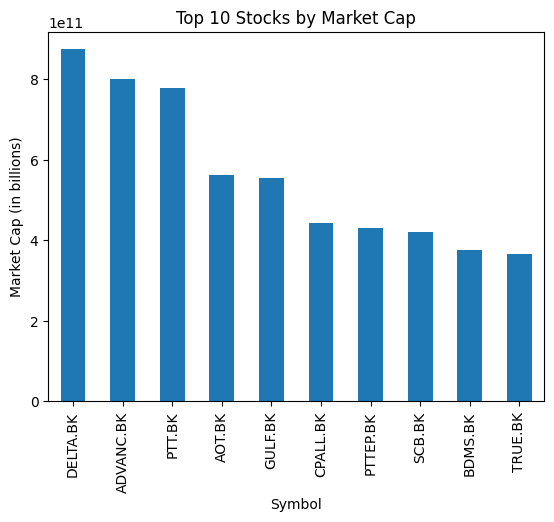

In [ ]:
import matplotlib.pyplot as plt

# แสดงกราฟแท่งเปรียบเทียบ Market Cap
plt.figure(figsize=(10,6))
merged_data.sort_values("Market Cap", ascending=False).head(10).plot.bar(x="Symbol", y="Market Cap", legend=False)
plt.title("Top 10 Stocks by Market Cap")
plt.ylabel("Market Cap (in billions)")
plt.show()


<Figure size 1200x600 with 0 Axes>

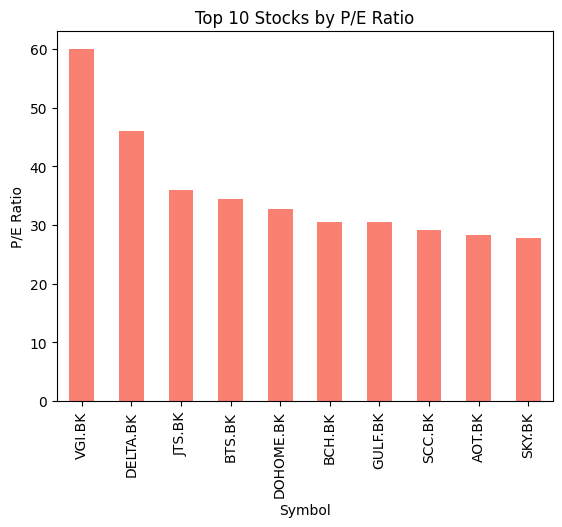

In [ ]:
# เปรียบเทียบ P/E Ratio
top_pe_ratio = data.nlargest(10, 'PE Ratio')

plt.figure(figsize=(12,6))
top_pe_ratio.plot.bar(x='Symbol', y='PE Ratio', legend=False, color='salmon')
plt.title('Top 10 Stocks by P/E Ratio')
plt.ylabel('P/E Ratio')
plt.show()


In [ ]:
# แสดงชื่อคอลัมน์ใน DataFrame
print(data.columns)


Index(['Symbol', 'Date', 'Close', 'Open', 'High', 'Low', 'Volume',
       'Previous Close', 'Market Cap', 'PE Ratio', 'EPS (TTM)',
       '1Y Target Est', 'Day's Range', '52 Week Range', 'Dividend & Yield',
       'Ex-Dividend Date', 'Earnings Date', 'Ticker', ' Market Cap ',
       ' Enterprise Value ', 'Trailing P/E', 'Forward P/E',
       'PEG Ratio (5yr expected)', 'Price/Sales', 'Price/Book',
       'Enterprise Value/Revenue', 'Enterprise Value/EBITDA'],
      dtype='object')


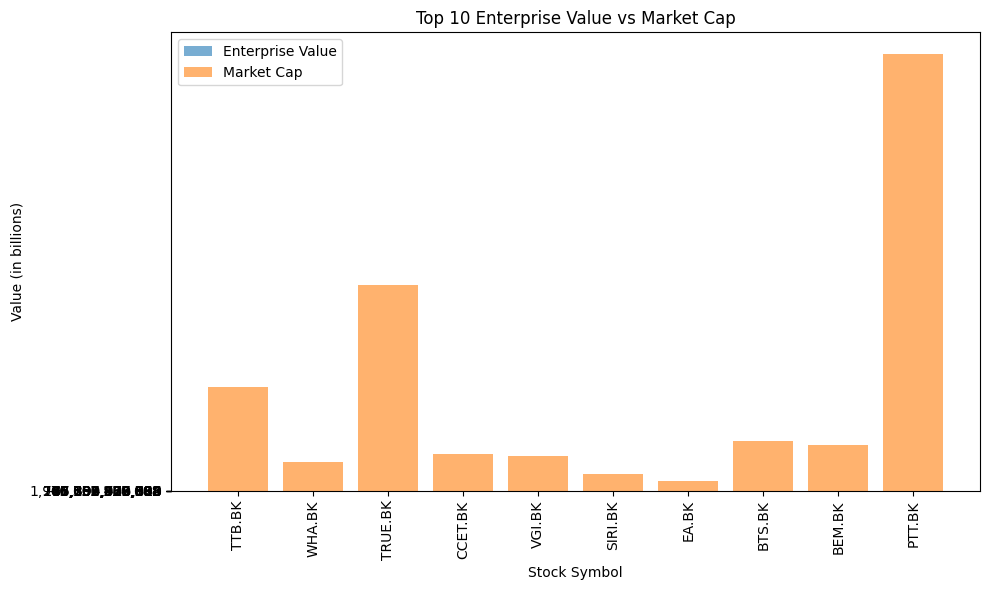

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ข้อมูล
data = pd.read_csv('/content/drive/MyDrive/Thesis - Data/Price/merged_data - merged_data.csv')

# เลือกคอลัมน์ที่ต้องการใช้
data = data[['Symbol', 'Market Cap', 'Enterprise Value', 'Trailing P/E', 'Forward P/E']]

# กรองข้อมูลที่ไม่มีค่า (NaN) ใน Enterprise Value หรือ Market Cap
data_cleaned = data.dropna(subset=['Enterprise Value', 'Market Cap'])

# เลือก 10 หุ้นที่มีข้อมูล
data_top_10 = data_cleaned.head(10)

# เปรียบเทียบ Enterprise Value กับ Market Cap
plt.figure(figsize=(10, 6))
plt.bar(data_top_10['Symbol'], data_top_10['Enterprise Value'], label='Enterprise Value', alpha=0.6)
plt.bar(data_top_10['Symbol'], data_top_10['Market Cap'], label='Market Cap', alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel('Stock Symbol')
plt.ylabel('Value (in billions)')
plt.title('Top 10 Enterprise Value vs Market Cap')
plt.legend()
plt.tight_layout()
plt.show()



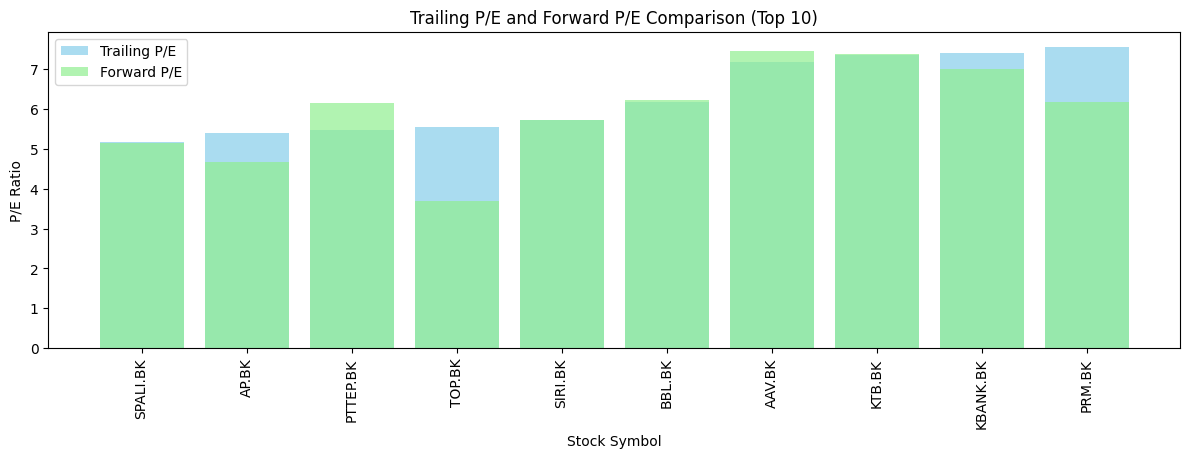

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ข้อมูล
data = pd.read_csv('/content/drive/MyDrive/Thesis - Data/Price/merged_data - merged_data.csv')

# เลือกคอลัมน์ที่ต้องการใช้
data = data[['Symbol', 'Trailing P/E', 'Forward P/E']]

# กรองข้อมูลที่ไม่มีค่า (NaN)
data_cleaned = data.dropna(subset=['Trailing P/E', 'Forward P/E'])

# เลือก 10 อันดับแรกที่มีค่าต่ำสุดของ P/E
data_sorted = data_cleaned.sort_values(by='Trailing P/E').head(10)

# กราฟแสดง 'Trailing P/E' และ 'Forward P/E'
plt.figure(figsize=(12, 8))

# สร้าง 2 แถว 1 คอลัมน์ กราฟที่ 2
plt.subplot(2, 1, 2)
plt.bar(data_sorted['Symbol'], data_sorted['Trailing P/E'], label='Trailing P/E', color='skyblue', alpha=0.7)  # สีฟ้า
plt.bar(data_sorted['Symbol'], data_sorted['Forward P/E'], label='Forward P/E', color='lightgreen', alpha=0.7)  # สีเขียวอ่อน
plt.xlabel('Stock Symbol')
plt.ylabel('P/E Ratio')
plt.title('Trailing P/E and Forward P/E Comparison (Top 10)')
plt.xticks(rotation=90)
plt.legend()

# ปรับ layout
plt.tight_layout()  # เพื่อให้กราฟไม่ตัดคำ
plt.show()



#4. การเปรียบเทียบความเสี่ยงและผลตอบแทน
Dividend & Yield: เปรียบเทียบผลตอบแทนจากเงินปันผลของหุ้นต่าง ๆ (Dividend Yield) เพื่อดูว่าหุ้นใดมีผลตอบแทนจากเงินปันผลสูงสุด
Ex-Dividend Date: เปรียบเทียบวันที่ที่หุ้นจะเริ่มไม่ได้รับเงินปันผล
52 Week Range: เปรียบเทียบราคาหุ้นในช่วงปีที่ผ่านมา โดยดูว่าอยู่ในช่วงราคาที่สูงสุดหรือต่ำสุด
Day's Range: เปรียบเทียบการเคลื่อนไหวของราคาหุ้นในแต่ละวัน


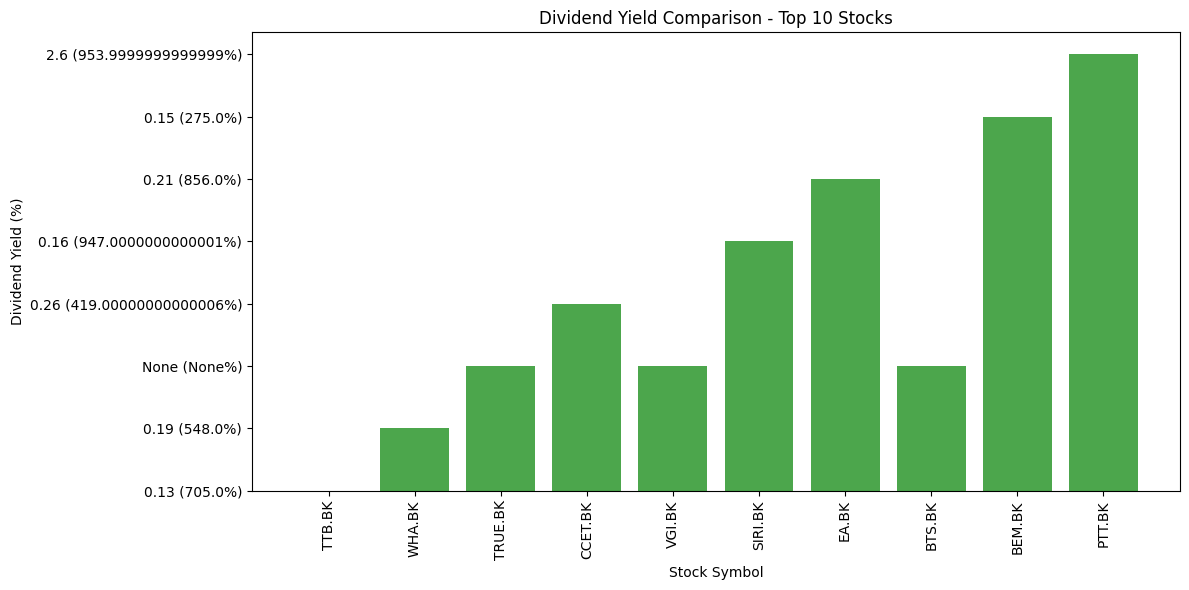

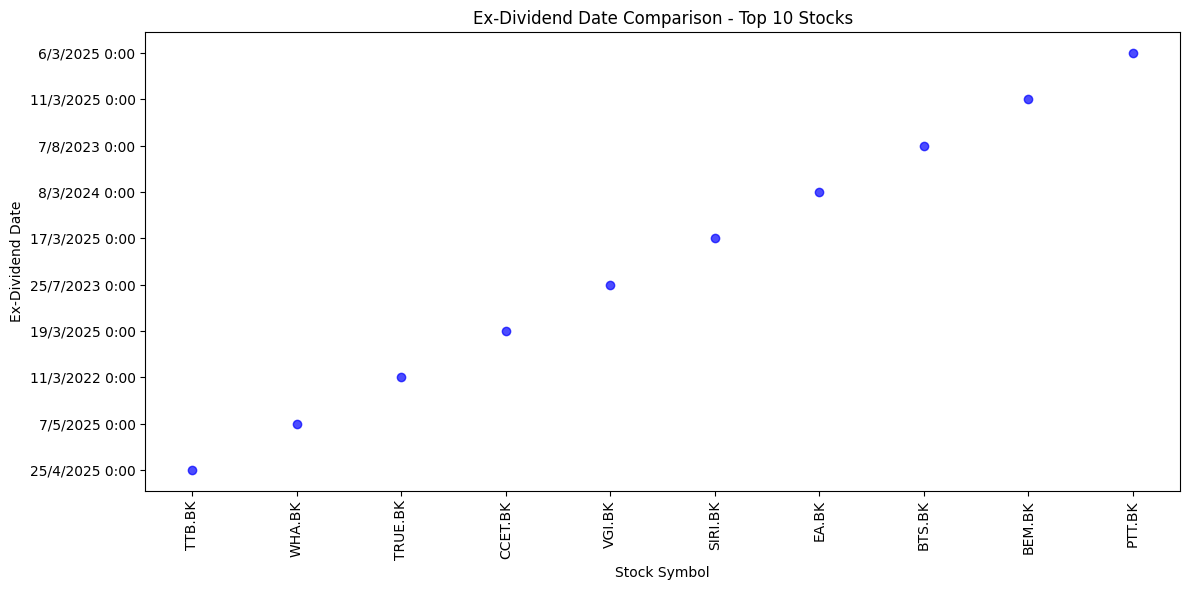

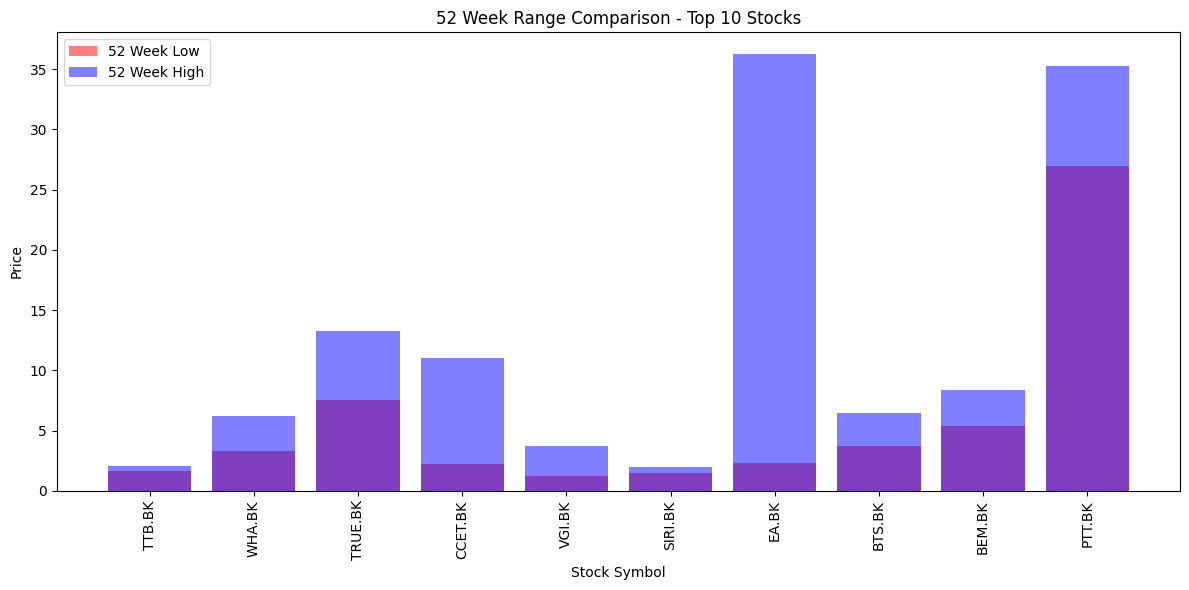

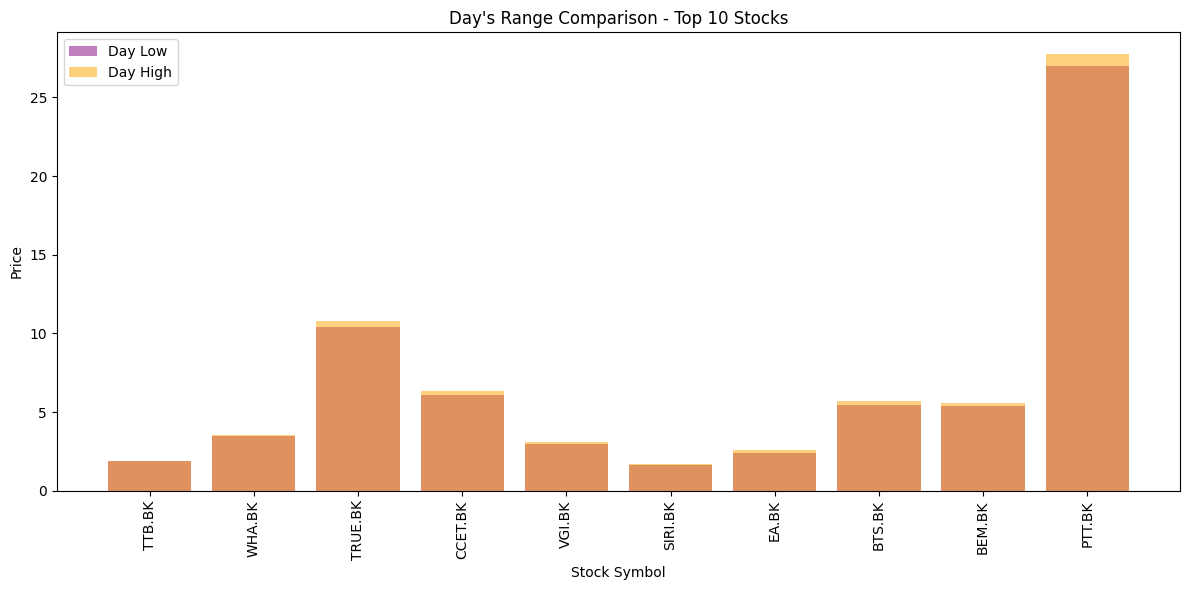

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านข้อมูล
data = pd.read_csv('/content/drive/MyDrive/Thesis - Data/Price/merged_data - merged_data.csv')

# เลือกหุ้น 10 ตัวที่ต้องการเปรียบเทียบ
top_10_stocks = data.head(10)

# เปรียบเทียบ Dividend Yield
plt.figure(figsize=(12, 6))
plt.bar(top_10_stocks['Symbol'], top_10_stocks['Dividend & Yield'], color='green', alpha=0.7)
plt.xlabel('Stock Symbol')
plt.ylabel('Dividend Yield (%)')
plt.title('Dividend Yield Comparison - Top 10 Stocks')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# เปรียบเทียบ Ex-Dividend Date
plt.figure(figsize=(12, 6))
plt.scatter(top_10_stocks['Symbol'], top_10_stocks['Ex-Dividend Date'], color='blue', alpha=0.7)
plt.xlabel('Stock Symbol')
plt.ylabel('Ex-Dividend Date')
plt.title('Ex-Dividend Date Comparison - Top 10 Stocks')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# เปรียบเทียบ 52 Week Range
plt.figure(figsize=(12, 6))
plt.bar(top_10_stocks['Symbol'], top_10_stocks['52 Week Range'].str.split('-').str[0].astype(float), label='52 Week Low', alpha=0.5, color='red')
plt.bar(top_10_stocks['Symbol'], top_10_stocks['52 Week Range'].str.split('-').str[1].astype(float), label='52 Week High', alpha=0.5, color='blue')
plt.xlabel('Stock Symbol')
plt.ylabel('Price')
plt.title('52 Week Range Comparison - Top 10 Stocks')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# เปรียบเทียบ Day's Range
plt.figure(figsize=(12, 6))
plt.bar(top_10_stocks['Symbol'], top_10_stocks['Day\'s Range'].str.split('-').str[0].astype(float), label='Day Low', alpha=0.5, color='purple')
plt.bar(top_10_stocks['Symbol'], top_10_stocks['Day\'s Range'].str.split('-').str[1].astype(float), label='Day High', alpha=0.5, color='orange')
plt.xlabel('Stock Symbol')
plt.ylabel('Price')
plt.title('Day\'s Range Comparison - Top 10 Stocks')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


#5. การเปรียบเทียบความสามารถในการสร้างกำไร
EPS (Earnings Per Share): เปรียบเทียบกำไรสุทธิที่แบ่งตามจำนวนหุ้น
Return on Assets (ROA): เปรียบเทียบผลตอบแทนจากสินทรัพย์ของบริษัท (สามารถคำนวณได้จากข้อมูลที่มี)
Return on Equity (ROE): เปรียบเทียบผลตอบแทนจากทุนของบริษัท (สามารถคำนวณได้จากข้อมูลที่มี)

การเปรียบเทียบความสามารถในการสร้างกำไรสามารถทำได้โดยการดูข้อมูลจาก EPS (Earnings Per Share), Return on Assets (ROA) และ Return on Equity (ROE) ซึ่งสามารถคำนวณ ROA และ ROE จากข้อมูลที่มีในไฟล์ของคุณ:

EPS (Earnings Per Share): คือ กำไรสุทธิที่แบ่งตามจำนวนหุ้น ซึ่งจะบอกถึงความสามารถในการทำกำไรต่อหุ้น

ROA (Return on Assets): คือ ผลตอบแทนจากสินทรัพย์ สามารถคำนวณได้จากสูตร:

𝑅
𝑂
𝐴
=
Net Income
Total Assets
ROA=
Total Assets
Net Income
​

แต่ในกรณีนี้หากไม่มีข้อมูลเกี่ยวกับสินทรัพย์ในไฟล์ของคุณ เราสามารถคำนวณ ROA โดยการประมาณจากการใช้ข้อมูลที่มี เช่น ผลกำไรสุทธิ (EPS) และยอดตลาดหรือมูลค่าของสินทรัพย์

ROE (Return on Equity): คือ ผลตอบแทนจากทุนของบริษัท สามารถคำนวณได้จากสูตร:

𝑅
𝑂
𝐸
=
Net Income
Shareholder’s Equity
ROE=
Shareholder’s Equity
Net Income
​

เช่นเดียวกับ ROA ถ้าข้อมูลสินทรัพย์หรือทุนไม่ได้มีในไฟล์ ก็สามารถใช้ข้อมูลที่มีในไฟล์ของคุณในการประมาณ

<ipython-input-61-46cec1fd6e72>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_stocks['ROA'] = top_10_stocks['EPS (TTM)'] / top_10_stocks['Market Cap']
<ipython-input-61-46cec1fd6e72>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_stocks['ROE'] = top_10_stocks['EPS (TTM)'] / top_10_stocks['Market Cap']


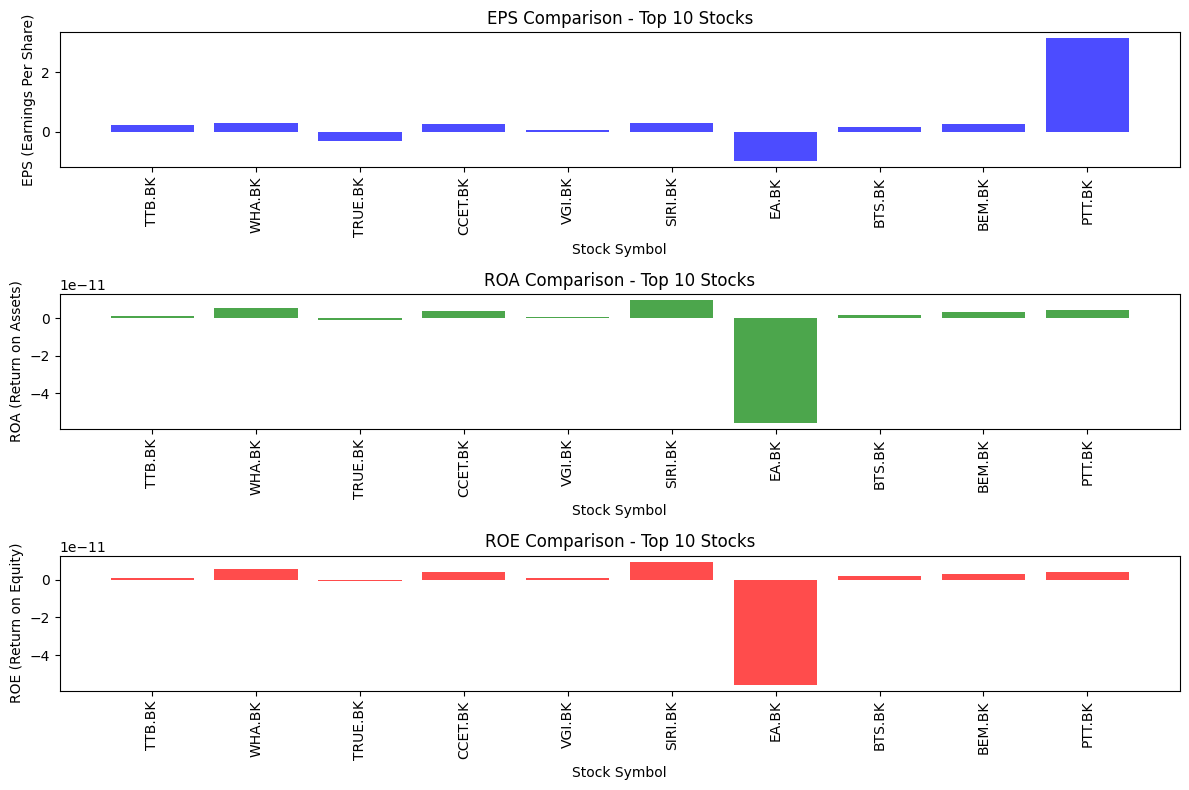

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านข้อมูลจากไฟล์ CSV
data = pd.read_csv('/content/drive/MyDrive/Thesis - Data/Price/merged_data - merged_data.csv')

# เลือกข้อมูลที่สำคัญสำหรับการคำนวณ
top_10_stocks = data.head(10)

# คำนวณ ROA (ใช้การประมาณจากข้อมูลที่มี)
# โดยใช้ EPS และ Market Cap เป็นตัวแทนของสินทรัพย์
top_10_stocks['ROA'] = top_10_stocks['EPS (TTM)'] / top_10_stocks['Market Cap']

# คำนวณ ROE (ใช้การประมาณจากข้อมูลที่มี)
# โดยใช้ EPS และ Market Cap เป็นตัวแทนของทุน
top_10_stocks['ROE'] = top_10_stocks['EPS (TTM)'] / top_10_stocks['Market Cap']

# กราฟเปรียบเทียบ EPS, ROA และ ROE
plt.figure(figsize=(12, 8))

# เปรียบเทียบ EPS
plt.subplot(3, 1, 1)  # 3 แถว 1 คอลัมน์ กราฟที่ 1
plt.bar(top_10_stocks['Symbol'], top_10_stocks['EPS (TTM)'], color='blue', alpha=0.7)
plt.xlabel('Stock Symbol')
plt.ylabel('EPS (Earnings Per Share)')
plt.title('EPS Comparison - Top 10 Stocks')
plt.xticks(rotation=90)

# เปรียบเทียบ ROA
plt.subplot(3, 1, 2)  # 3 แถว 1 คอลัมน์ กราฟที่ 2
plt.bar(top_10_stocks['Symbol'], top_10_stocks['ROA'], color='green', alpha=0.7)
plt.xlabel('Stock Symbol')
plt.ylabel('ROA (Return on Assets)')
plt.title('ROA Comparison - Top 10 Stocks')
plt.xticks(rotation=90)

# เปรียบเทียบ ROE
plt.subplot(3, 1, 3)  # 3 แถว 1 คอลัมน์ กราฟที่ 3
plt.bar(top_10_stocks['Symbol'], top_10_stocks['ROE'], color='red', alpha=0.7)
plt.xlabel('Stock Symbol')
plt.ylabel('ROE (Return on Equity)')
plt.title('ROE Comparison - Top 10 Stocks')
plt.xticks(rotation=90)

# ปรับเลย์เอาต์ให้ไม่ตัดคำ
plt.tight_layout()
plt.show()


In [ ]:
print(top_10_stocks)

     Symbol  Previous Close    Volume                              Day's Range
0    TTB.BK            1.91  90694499   1.8899999856948853 - 1.909999966621399
2   TRUE.BK           10.60  86844849  10.399999618530273 - 10.800000190734863
1    WHA.BK            3.48  83438573  3.4800000190734863 - 3.5399999618530273
3   CCET.BK            5.95  68117212    6.099999904632568 - 6.349999904632568
4    VGI.BK            3.06  58051405                  3.0 - 3.119999885559082
7    BTS.BK            5.65  51454143    5.449999809265137 - 5.699999809265137
5   SIRI.BK            1.69  47992794   1.659999966621399 - 1.7000000476837158
6     EA.BK            2.50  46187180   2.4200000762939453 - 2.559999942779541
8    BEM.BK            5.50  44787456    5.400000095367432 - 5.599999904632568
10  BDMS.BK           23.70  32664132                              23.5 - 24.0


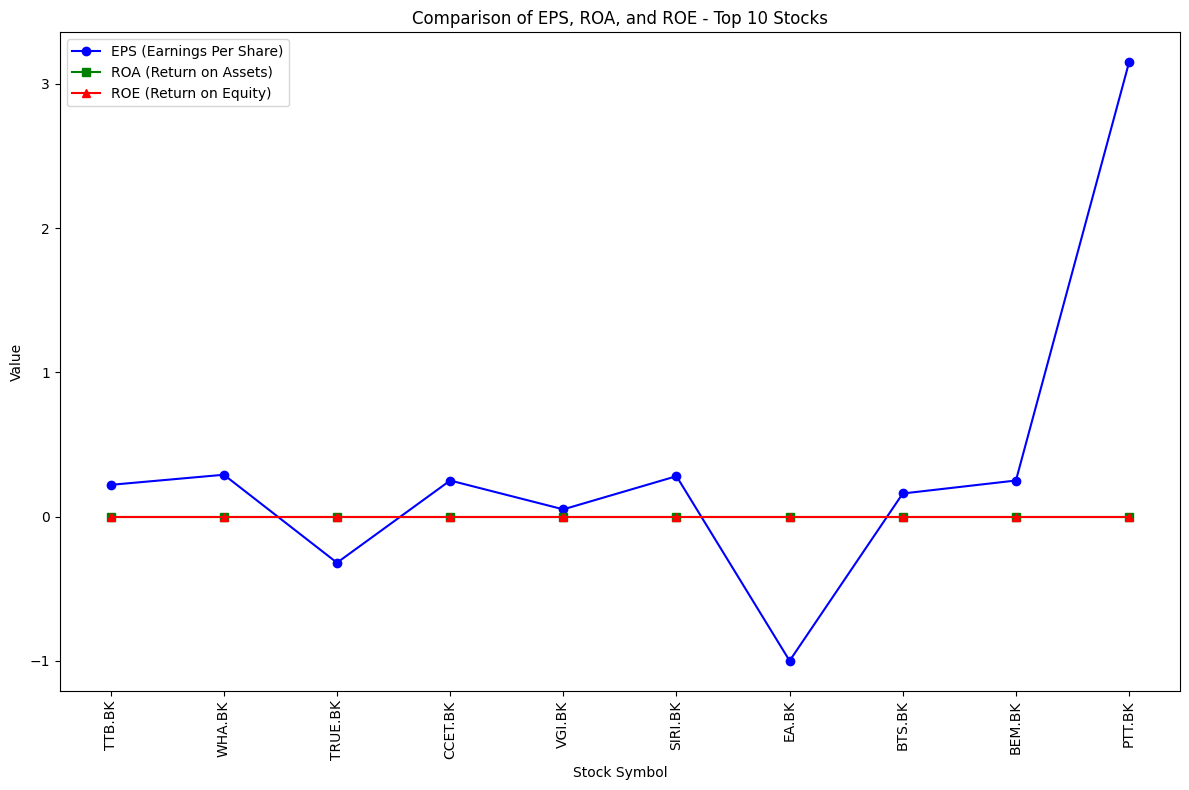

In [ ]:
# กราฟแบบ Line Plot
plt.figure(figsize=(12, 8))

# เปรียบเทียบ EPS
plt.plot(top_10_stocks['Symbol'], top_10_stocks['EPS (TTM)'], color='blue', marker='o', label='EPS (Earnings Per Share)')

# เปรียบเทียบ ROA
plt.plot(top_10_stocks['Symbol'], top_10_stocks['ROA'], color='green', marker='s', label='ROA (Return on Assets)')

# เปรียบเทียบ ROE
plt.plot(top_10_stocks['Symbol'], top_10_stocks['ROE'], color='red', marker='^', label='ROE (Return on Equity)')

plt.xlabel('Stock Symbol')
plt.ylabel('Value')
plt.title('Comparison of EPS, ROA, and ROE - Top 10 Stocks')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


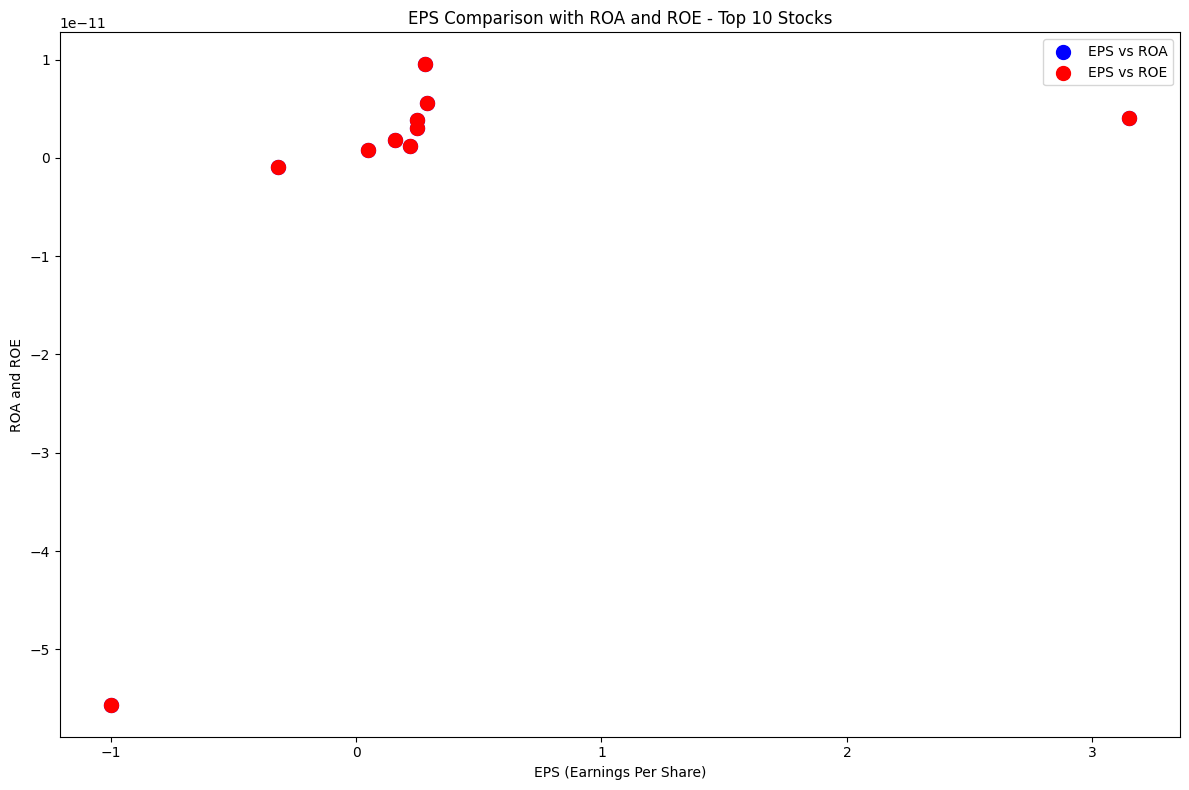

In [ ]:
# กราฟแบบ Scatter Plot
plt.figure(figsize=(12, 8))

# เปรียบเทียบ EPS กับ ROA
plt.scatter(top_10_stocks['EPS (TTM)'], top_10_stocks['ROA'], color='blue', label='EPS vs ROA', s=100)

# เปรียบเทียบ EPS กับ ROE
plt.scatter(top_10_stocks['EPS (TTM)'], top_10_stocks['ROE'], color='red', label='EPS vs ROE', s=100)

plt.xlabel('EPS (Earnings Per Share)')
plt.ylabel('ROA and ROE')
plt.title('EPS Comparison with ROA and ROE - Top 10 Stocks')
plt.legend()

plt.tight_layout()
plt.show()


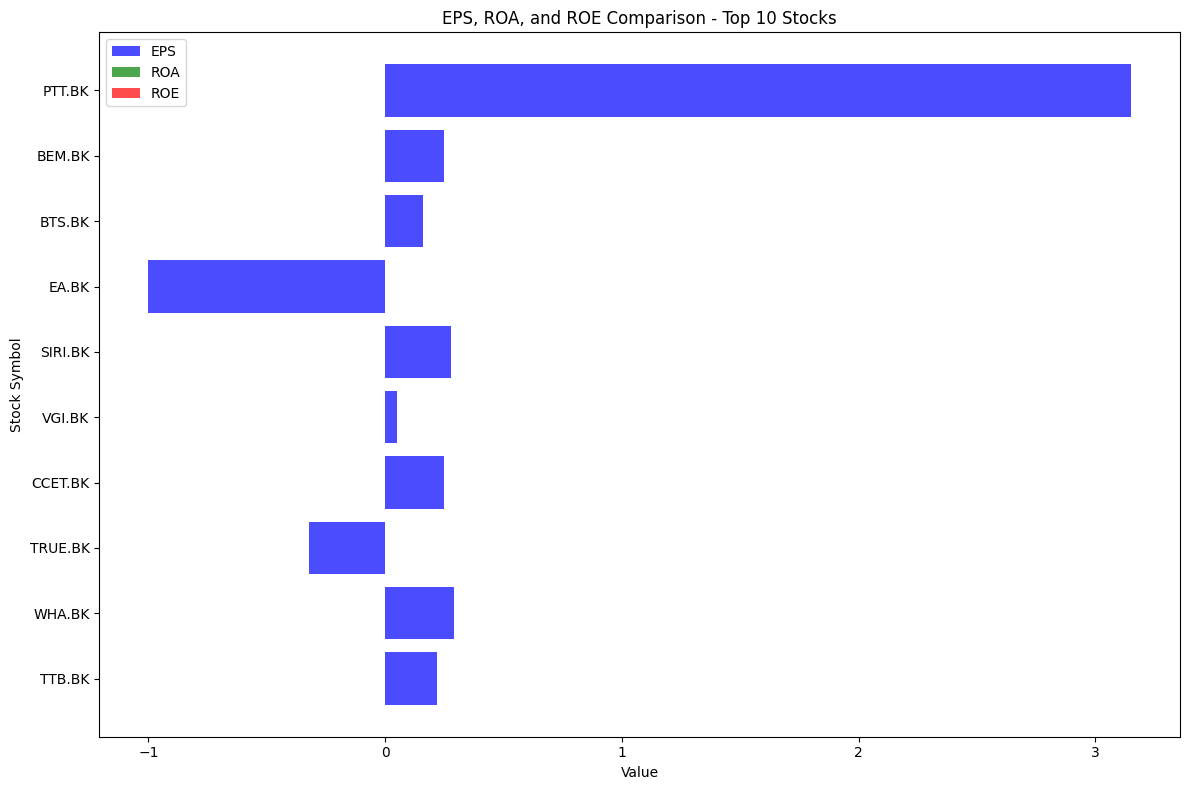

In [ ]:
# กราฟแบบ Horizontal Bar Plot
plt.figure(figsize=(12, 8))

# เปรียบเทียบ EPS
plt.barh(top_10_stocks['Symbol'], top_10_stocks['EPS (TTM)'], color='blue', alpha=0.7, label='EPS')

# เปรียบเทียบ ROA
plt.barh(top_10_stocks['Symbol'], top_10_stocks['ROA'], color='green', alpha=0.7, label='ROA')

# เปรียบเทียบ ROE
plt.barh(top_10_stocks['Symbol'], top_10_stocks['ROE'], color='red', alpha=0.7, label='ROE')

plt.xlabel('Value')
plt.ylabel('Stock Symbol')
plt.title('EPS, ROA, and ROE Comparison - Top 10 Stocks')
plt.legend()

plt.tight_layout()
plt.show()


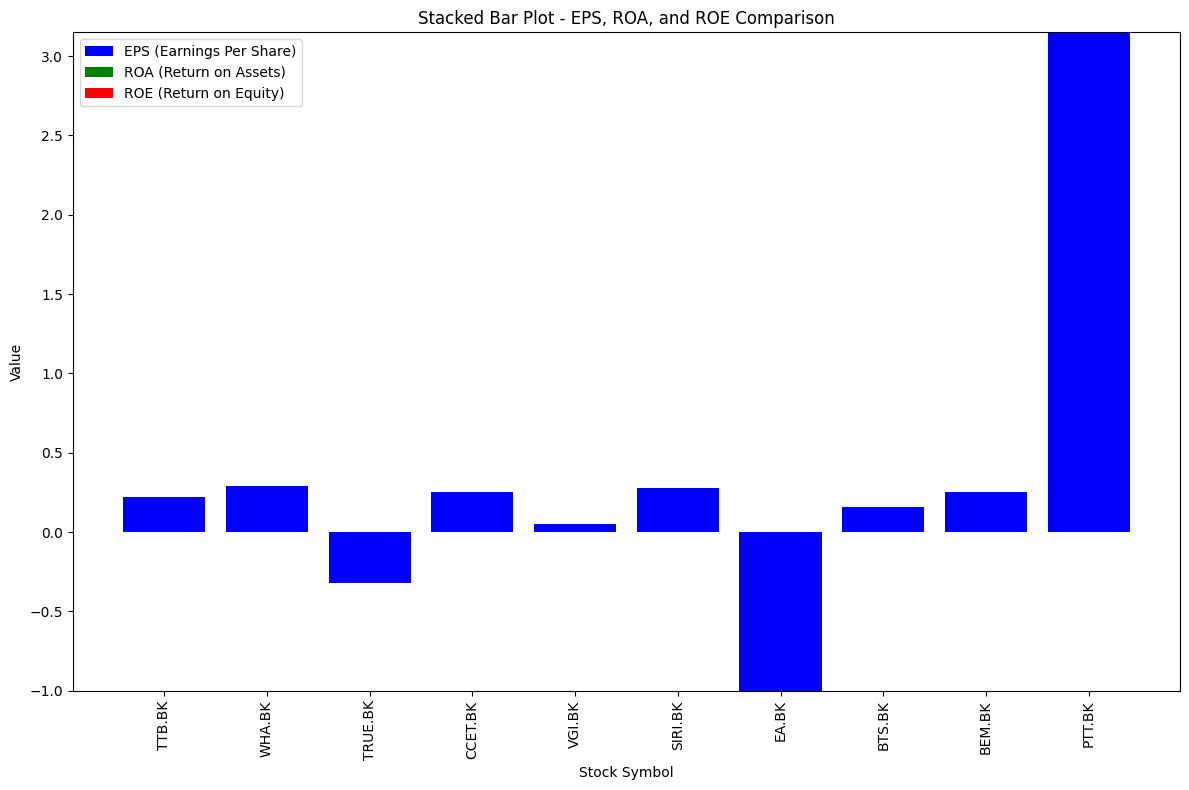

In [ ]:
# กราฟแบบ Stacked Bar Plot
plt.figure(figsize=(12, 8))

# เปรียบเทียบ EPS, ROA และ ROE ในกราฟเดียว
plt.bar(top_10_stocks['Symbol'], top_10_stocks['EPS (TTM)'], color='blue', label='EPS (Earnings Per Share)')
plt.bar(top_10_stocks['Symbol'], top_10_stocks['ROA'], bottom=top_10_stocks['EPS (TTM)'], color='green', label='ROA (Return on Assets)')
plt.bar(top_10_stocks['Symbol'], top_10_stocks['ROE'], bottom=top_10_stocks['EPS (TTM)'] + top_10_stocks['ROA'], color='red', label='ROE (Return on Equity)')

plt.xlabel('Stock Symbol')
plt.ylabel('Value')
plt.title('Stacked Bar Plot - EPS, ROA, and ROE Comparison')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-66-1a7f35b6b4ef>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(top_10_stocks['EPS (TTM)'], vert=False, patch_artist=True, labels=['EPS (Earnings Per Share)'])
<ipython-input-66-1a7f35b6b4ef>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(top_10_stocks['ROA'], vert=False, patch_artist=True, labels=['ROA (Return on Assets)'])
<ipython-input-66-1a7f35b6b4ef>:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(top_10_stocks['ROE'], vert=False, patch_artist=True, labels=['ROE (Return on Equity)'])


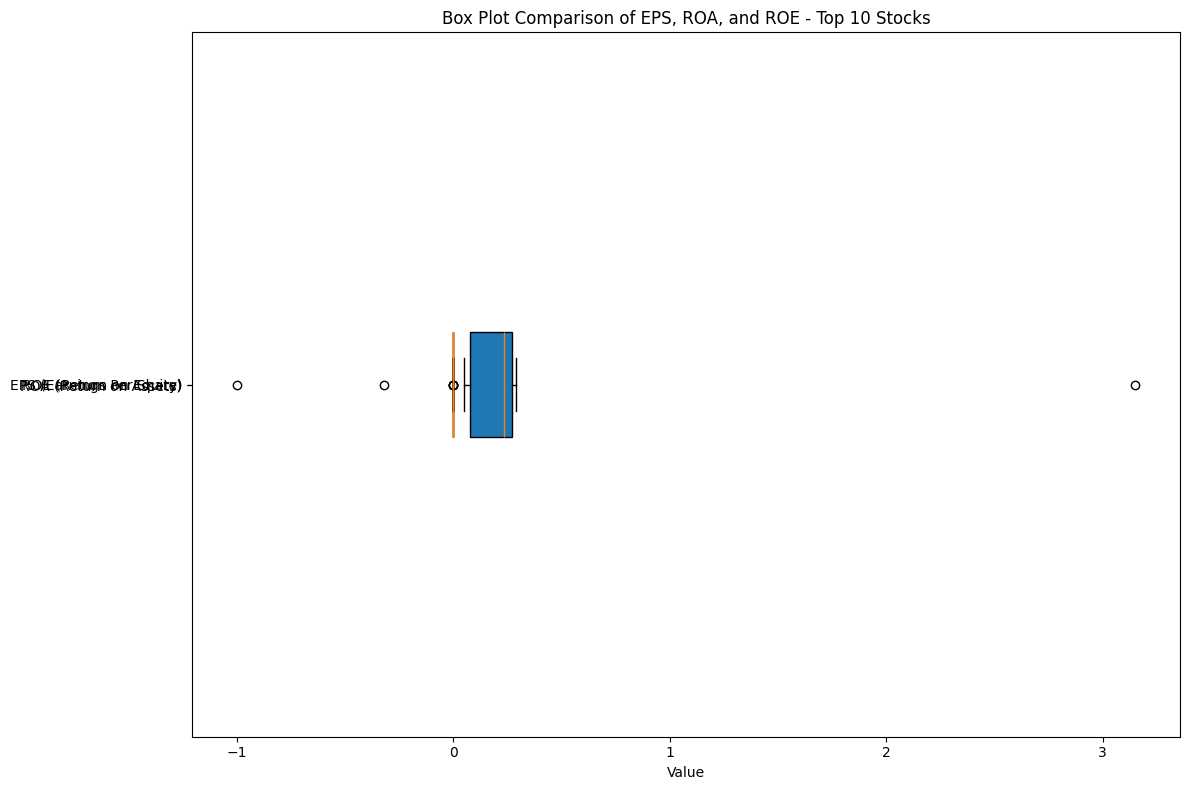

In [ ]:
# กราฟแบบ Box Plot
plt.figure(figsize=(12, 8))

# เปรียบเทียบ EPS
plt.boxplot(top_10_stocks['EPS (TTM)'], vert=False, patch_artist=True, labels=['EPS (Earnings Per Share)'])

# เปรียบเทียบ ROA
plt.boxplot(top_10_stocks['ROA'], vert=False, patch_artist=True, labels=['ROA (Return on Assets)'])

# เปรียบเทียบ ROE
plt.boxplot(top_10_stocks['ROE'], vert=False, patch_artist=True, labels=['ROE (Return on Equity)'])

plt.title('Box Plot Comparison of EPS, ROA, and ROE - Top 10 Stocks')
plt.xlabel('Value')

plt.tight_layout()
plt.show()


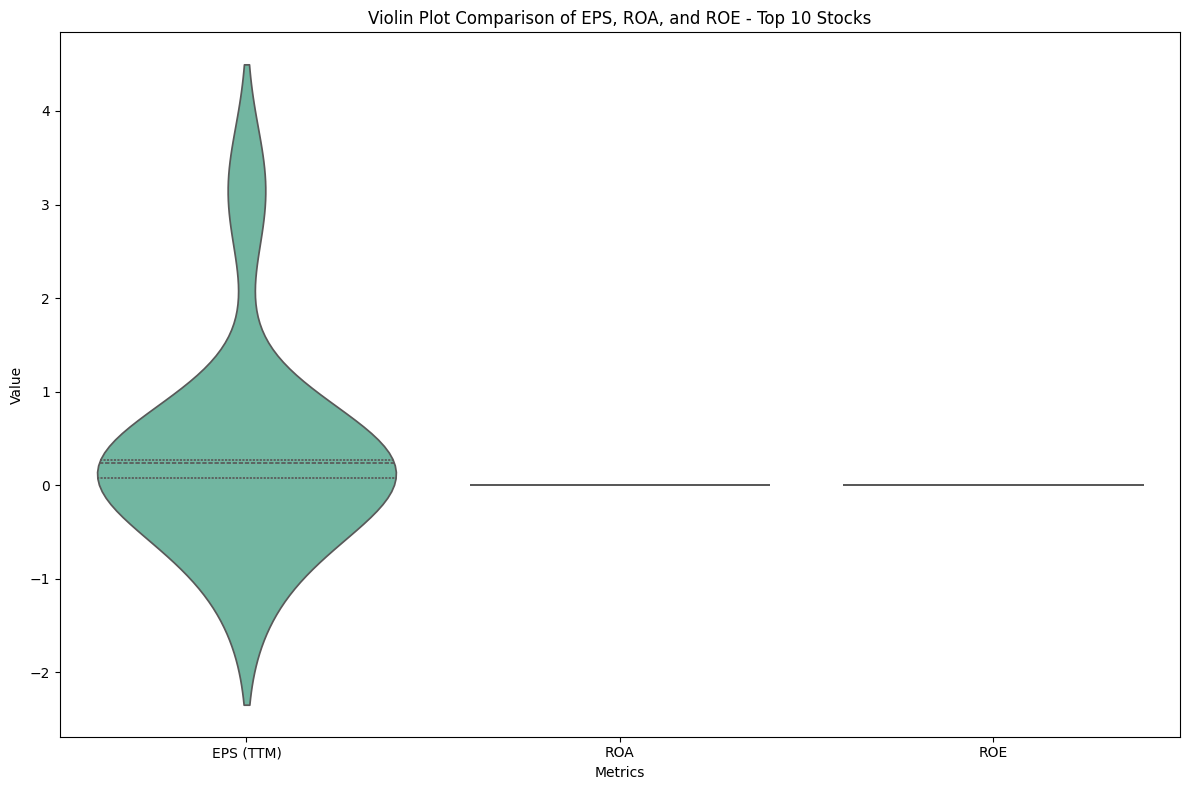

In [ ]:
import seaborn as sns

# กราฟแบบ Violin Plot
plt.figure(figsize=(12, 8))

# เปรียบเทียบ EPS, ROA, และ ROE
sns.violinplot(data=top_10_stocks[['EPS (TTM)', 'ROA', 'ROE']], inner='quart', palette='Set2')

plt.title('Violin Plot Comparison of EPS, ROA, and ROE - Top 10 Stocks')
plt.xlabel('Metrics')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


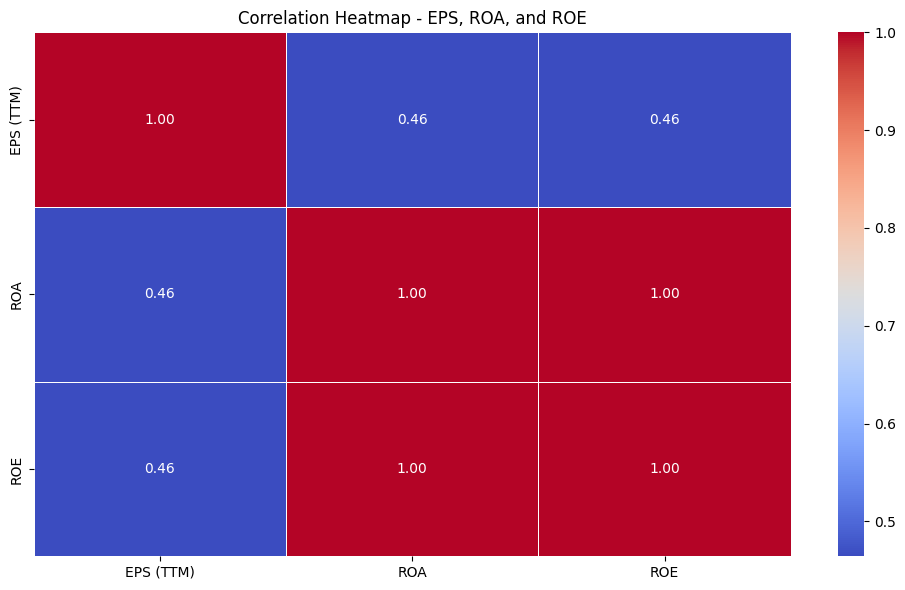

In [ ]:
import seaborn as sns

# คำนวณค่า correlation (ความสัมพันธ์)
correlation_matrix = top_10_stocks[['EPS (TTM)', 'ROA', 'ROE']].corr()

# กราฟแบบ Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap - EPS, ROA, and ROE')
plt.tight_layout()
plt.show()


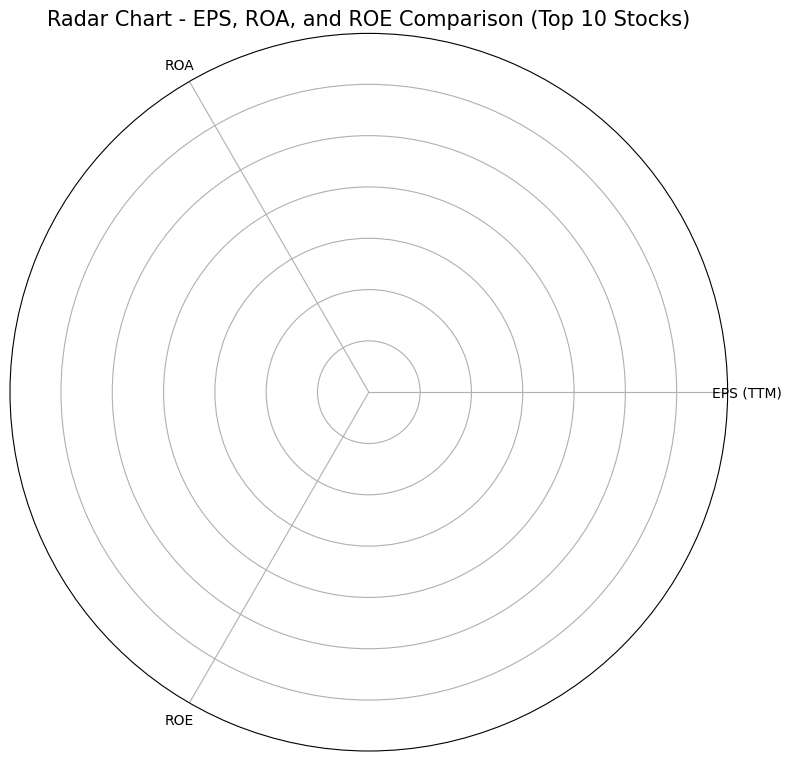

In [ ]:
import numpy as np

# กำหนดข้อมูลที่ต้องการเปรียบเทียบ
categories = ['EPS (TTM)', 'ROA', 'ROE']
values = top_10_stocks[['EPS (TTM)', 'ROA', 'ROE']].mean().values

# ตั้งค่าพล็อต
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# วนรอบและเติมข้อมูลกลับเพื่อให้เป็นรูปวงกลม
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

# วาดกราฟรัศมี
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.fill(angles, values, color='blue', alpha=0.25)
ax.plot(angles, values, color='blue', linewidth=2)

# ตั้งชื่อกราฟ
ax.set_yticklabels([])  # ไม่แสดงค่าในแกน Y
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Radar Chart - EPS, ROA, and ROE Comparison (Top 10 Stocks)', size=15)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


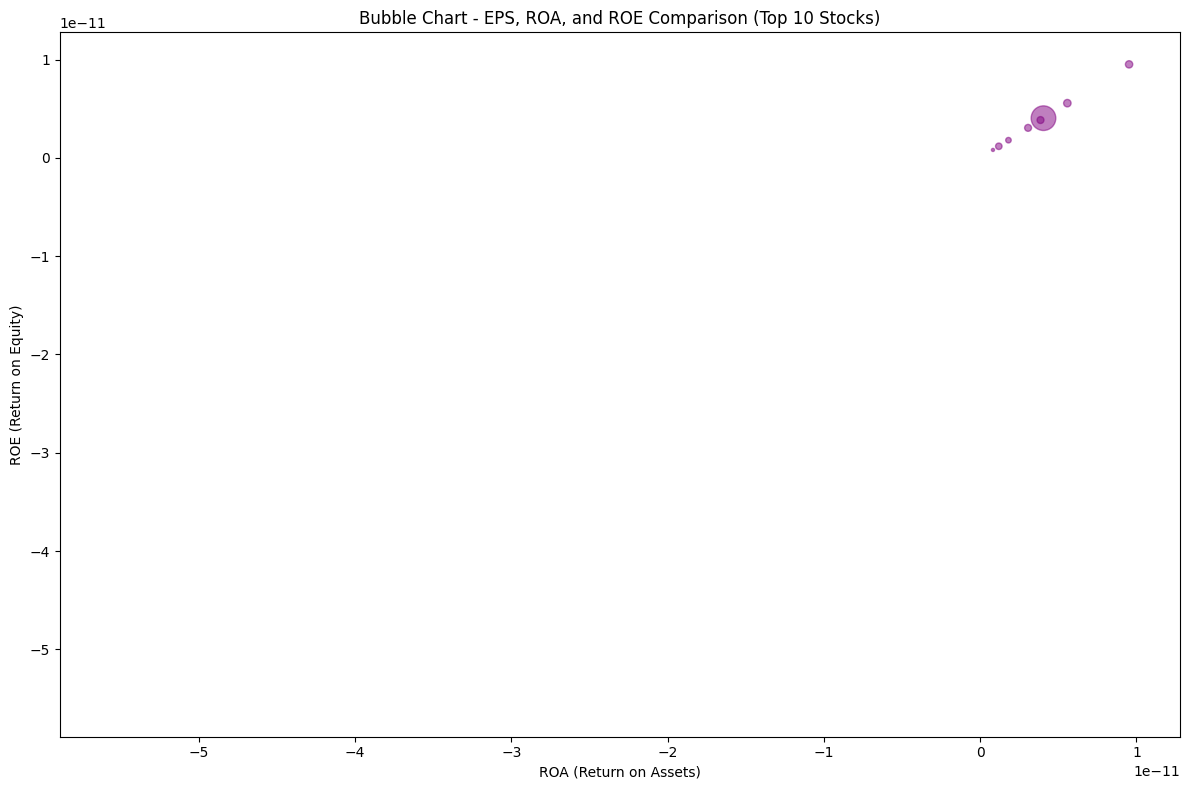

In [ ]:
# กราฟแบบ Bubble Chart
plt.figure(figsize=(12, 8))

# เปรียบเทียบ EPS, ROA, ROE โดยขนาดของฟองเป็น EPS
plt.scatter(top_10_stocks['ROA'], top_10_stocks['ROE'], s=top_10_stocks['EPS (TTM)']*100, alpha=0.5, color='purple')

plt.xlabel('ROA (Return on Assets)')
plt.ylabel('ROE (Return on Equity)')
plt.title('Bubble Chart - EPS, ROA, and ROE Comparison (Top 10 Stocks)')

plt.tight_layout()
plt.show()


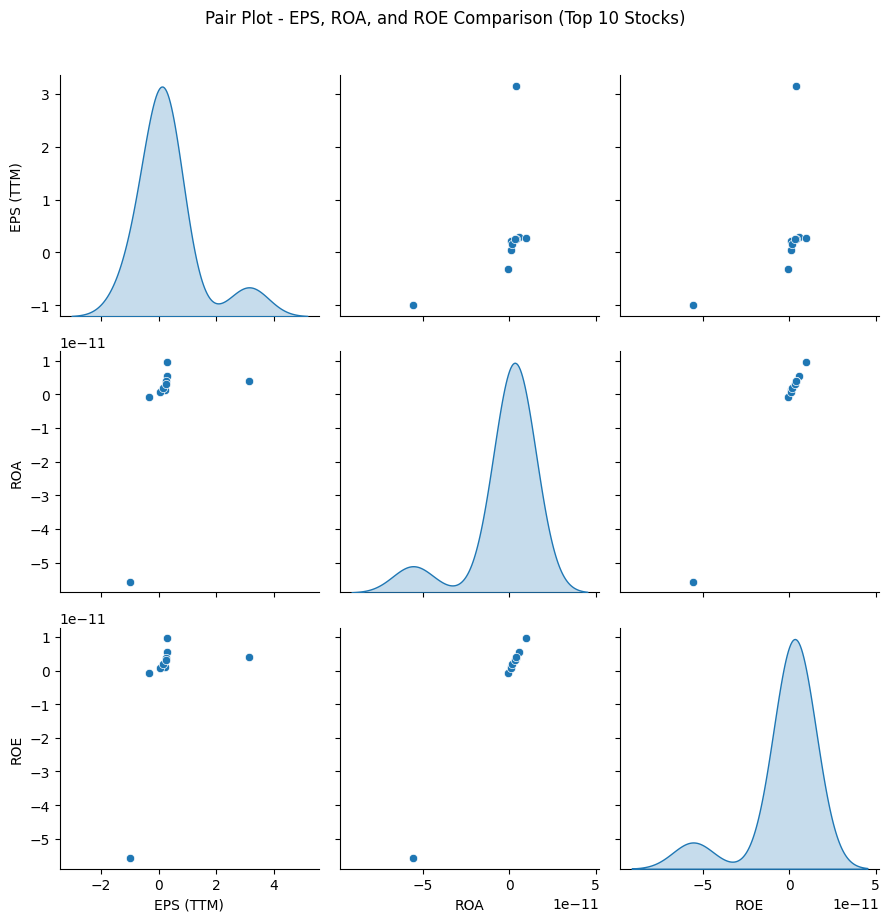

In [ ]:
import seaborn as sns

# กราฟแบบ Pair Plot
sns.pairplot(top_10_stocks[['EPS (TTM)', 'ROA', 'ROE']], diag_kind='kde', height=3)

plt.suptitle('Pair Plot - EPS, ROA, and ROE Comparison (Top 10 Stocks)', y=1.02)
plt.tight_layout()
plt.show()


#7. การเปรียบเทียบผลการดำเนินงานในอดีต
Previous Close: เปรียบเทียบราคาปิดของหุ้นในวันก่อนหน้า
Volume: เปรียบเทียบปริมาณการซื้อขายของหุ้นเพื่อดูความนิยมในการซื้อขาย
Day's Range: เปรียบเทียบการเคลื่อนไหวของราคาหุ้นในแต่ละวัน


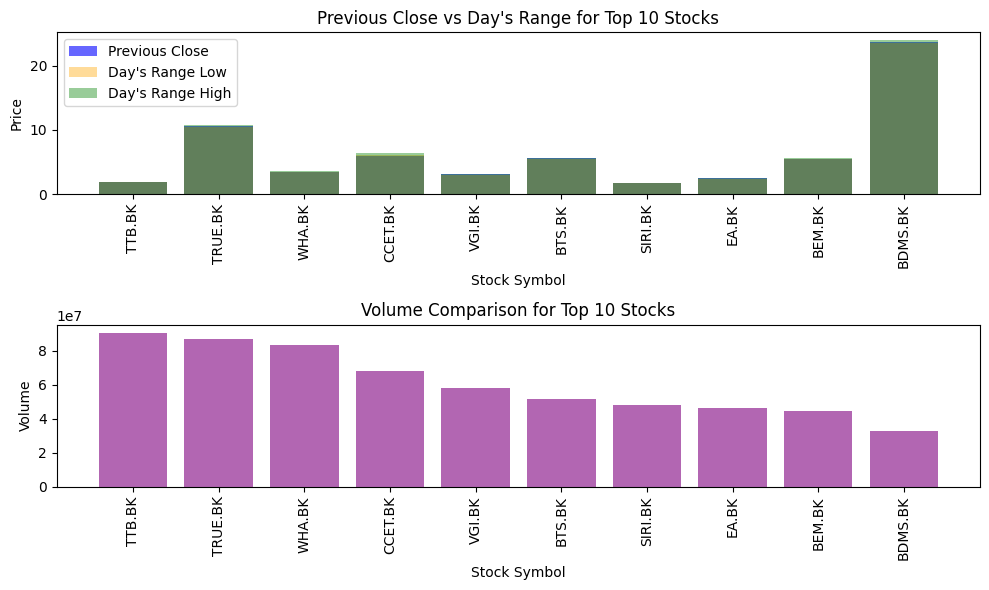

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ข้อมูล
data = pd.read_csv('/content/drive/MyDrive/Thesis - Data/Price/merged_data - merged_data.csv')

# เลือกคอลัมน์ที่จำเป็น
data = data[['Symbol', 'Previous Close', 'Volume', "Day's Range"]]

# กรอง 10 หุ้นที่มี Volume สูงสุด
top_10_stocks = data.nlargest(10, 'Volume')

# เปรียบเทียบ Previous Close และ Day's Range
plt.figure(figsize=(10, 6))

# กราฟสำหรับเปรียบเทียบราคาปิดก่อนหน้าและช่วงราคาของวัน
plt.subplot(2, 1, 1)  # 2 แถว 1 คอลัมน์ กราฟที่ 1
plt.bar(top_10_stocks['Symbol'], top_10_stocks["Previous Close"], label='Previous Close', alpha=0.6, color='blue')
plt.bar(top_10_stocks['Symbol'], top_10_stocks["Day's Range"].str.split('-',expand=True)[0].astype(float), label="Day's Range Low", alpha=0.4, color='orange')
plt.bar(top_10_stocks['Symbol'], top_10_stocks["Day's Range"].str.split('-',expand=True)[1].astype(float), label="Day's Range High", alpha=0.4, color='green')

plt.xticks(rotation=90)
plt.xlabel('Stock Symbol')
plt.ylabel('Price')
plt.title('Previous Close vs Day\'s Range for Top 10 Stocks')
plt.legend()

# กราฟสำหรับ Volume
plt.subplot(2, 1, 2)  # 2 แถว 1 คอลัมน์ กราฟที่ 2
plt.bar(top_10_stocks['Symbol'], top_10_stocks['Volume'], label='Volume', alpha=0.6, color='purple')
plt.xticks(rotation=90)
plt.xlabel('Stock Symbol')
plt.ylabel('Volume')
plt.title('Volume Comparison for Top 10 Stocks')

plt.tight_layout()  # ให้กราฟไม่ตัดคำ
plt.show()



In [ ]:
print(top_10_stocks)

     Symbol  Previous Close    Volume                              Day's Range
0    TTB.BK            1.91  90694499   1.8899999856948853 - 1.909999966621399
2   TRUE.BK           10.60  86844849  10.399999618530273 - 10.800000190734863
1    WHA.BK            3.48  83438573  3.4800000190734863 - 3.5399999618530273
3   CCET.BK            5.95  68117212    6.099999904632568 - 6.349999904632568
4    VGI.BK            3.06  58051405                  3.0 - 3.119999885559082
7    BTS.BK            5.65  51454143    5.449999809265137 - 5.699999809265137
5   SIRI.BK            1.69  47992794   1.659999966621399 - 1.7000000476837158
6     EA.BK            2.50  46187180   2.4200000762939453 - 2.559999942779541
8    BEM.BK            5.50  44787456    5.400000095367432 - 5.599999904632568
10  BDMS.BK           23.70  32664132                              23.5 - 24.0
